In [4]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
#you need to install pandas datareader first. If you are using Canopy, you may comment out the first line. If you are using Anaconda, you may comment out the second line.
#!pip install pandas-datareader
#conda install -c anaconda pandas-datareader 
#!pip install --upgrade pandas
import pandas as pd
import numpy as np
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data, wb
import plotly.express as px
import cufflinks as cf
import datetime
import seaborn as sns
from datetime import date
%matplotlib inline

In [6]:
start = datetime.datetime(2020, 1, 1)

end = date.today()

In [7]:
# Amazon
Amazon = data.DataReader("AMZN", 'yahoo', start, end)

# Facebook
Facebook = data.DataReader("META", 'yahoo', start, end)

# Google
Google = data.DataReader("GOOG", 'yahoo', start, end)

# Microsoft
Microsoft = data.DataReader("MSFT", 'yahoo', start, end)

# Twitter
Twitter = data.DataReader("TWTR", 'yahoo', start, end)

# Apple
Apple = data.DataReader("AAPL", 'yahoo', start, end)

In [8]:
Amazon.reset_index(inplace=True)
Amazon["Date"].value_counts()
Facebook.reset_index(inplace=True)
Facebook["Date"].value_counts()
Google.reset_index(inplace=True)
Google["Date"].value_counts()
Microsoft.reset_index(inplace=True)
Microsoft["Date"].value_counts()
Twitter.reset_index(inplace=True)
Twitter["Date"].value_counts()
Apple.reset_index(inplace=True)
Apple["Date"].value_counts()

2020-04-13    1
2021-10-04    1
2020-10-14    1
2022-09-16    1
2020-12-15    1
             ..
2020-07-14    1
2021-11-05    1
2020-09-14    1
2022-01-06    1
2020-02-11    1
Name: Date, Length: 726, dtype: int64

In [10]:
Amazon["Company"]='Amazon'
Facebook["Company"]='Facebook'
Microsoft["Company"]='Microsoft'
Twitter["Company"]='Twitter'
Apple["Company"]='Apple'
Google["Company"]='Google'

##### Draw the closing prices of Amazon

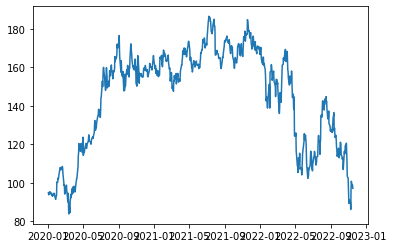

In [11]:
import matplotlib.pyplot as plt

# your code here
plt.plot(Amazon['Date'],Amazon['Close'])

Using plotly express

In [12]:
import plotly.express as px
fig = px.line(Amazon, x="Date", y="Close", title='Closing price for Amazon')
fig.show()

##### Append all the data sets - these six tables

In [13]:
# your code here
DataSet=pd.concat([Amazon,Facebook,Google,Microsoft,Twitter,Apple],sort=True)
DataSet

Adj Close       Close Company       Date        High         Low  \
0     94.900497   94.900497  Amazon 2020-01-02   94.900497   93.207497   
1     93.748497   93.748497  Amazon 2020-01-03   94.309998   93.224998   
2     95.143997   95.143997  Amazon 2020-01-06   95.184502   93.000000   
3     95.343002   95.343002  Amazon 2020-01-07   95.694504   94.601997   
4     94.598503   94.598503  Amazon 2020-01-08   95.550003   94.321999   
..          ...         ...     ...        ...         ...         ...   
721  146.869995  146.869995   Apple 2022-11-10  146.869995  139.500000   
722  149.699997  149.699997   Apple 2022-11-11  150.009995  144.369995   
723  148.279999  148.279999   Apple 2022-11-14  150.279999  147.429993   
724  150.039993  150.039993   Apple 2022-11-15  153.589996  148.559998   
725  148.789993  148.789993   Apple 2022-11-16  149.869995  147.289993   

           Open       Volume  
0     93.750000   80580000.0  
1     93.224998   75288000.0  
2     93.000000   81236000.0  
3     95.224998   80898000.0  
4     94.902000   70160000.0  
..          ...          ...  
721  141.240005  118854000.0  
722  145.820007   93903800.0  
723  148.970001   73374100.0  
724  152.220001   89868300.0  
725  149.130005   64218266.0  

[4342 rows x 8 columns]

** Derive the average closing price for each company, and then plot the average closing price using a line plot for each company using matplotlib or other visualization libraries (e.g. plotly and seaborn). **

In [14]:
# your code here
average_closing_price=DataSet.groupby('Company').Close.mean().to_frame()
#average_closing_price
average_closing_price.reset_index(inplace=True)
fig = px.line(average_closing_price, x="Company", y="Close", title='Average Closing Price')
fig.show()

Bar Chart to explain the average closing price for each company

In [15]:
average_closing_price=DataSet.groupby('Company').Close.mean().to_frame()
average_closing_price.reset_index(inplace=True)
fig = px.bar(average_closing_price, x="Company", y="Close", title='Average Closing Price')
fig.show()

** Generate a spread chart using the adj closing price for the company Amazon and Facebook. **

In [20]:
# your code here
cf.go_offline()
Adj_Close_df = pd.DataFrame()
Adj_Close_df["Dates"] = Amazon["Date"]
Adj_Close_df["Amazon"] = Amazon["Adj Close"]
Adj_Close_df["FaceBook"] = Facebook["Adj Close"]
Upd_Adj_Close_df = Adj_Close_df.set_index('Dates')
Upd_Adj_Close_df.iplot(kind='spread',xTitle='Date',yTitle='Adj Closing Price')

** Create a new dataframe called returns. This dataframe will contain the returns for each company's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

** We can use pandas pct_change() method on the Close column to create a new dataframe representing this return value. Use .groupby().**

In [21]:
# your code here
returns=pd.DataFrame()
returns=DataSet.groupby('Company').Close.pct_change()
returns

0           NaN
1     -0.012139
2      0.014886
3      0.002092
4     -0.007809
         ...   
721    0.088975
722    0.019269
723   -0.009486
724    0.011869
725   -0.008331
Name: Close, Length: 4342, dtype: float64

** Using this returns DataFrame, plot the distribution of single day returns of each company across the entire time period ?**

In [22]:
# your code here
DataSet['pct'] = returns
fig=px.line(DataSet,x='Date',y='pct',color='Company')
fig.show()

** Choose a figure to visualize the standard deviation of the returns over the entire time period **

In [23]:
#  your code here
#use spread chart
std_max=DataSet.groupby('Company').pct.std().to_frame()
std_max.reset_index(inplace=True)
fig=px.bar(std_max,x='Company',y='pct',title='Standard Deviation of the returns')
fig.show()

Create a density plot using any library you like to visualize the return for each company in 2020

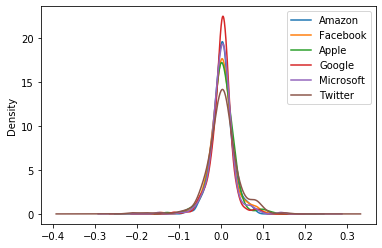

In [24]:
# your code here
DataSet['Year']=DataSet.Date.map(lambda x:str(x)[:4])
DataSet_2020 = DataSet[DataSet['Year'] == '2020']

DataSet_2020[DataSet_2020["Company"] == "Amazon"].pct.plot.density()
DataSet_2020[DataSet_2020["Company"] == "Facebook"].pct.plot.density()
DataSet_2020[DataSet_2020["Company"] == "Apple"].pct.plot.density()
DataSet_2020[DataSet_2020["Company"] == "Google"].pct.plot.density()
DataSet_2020[DataSet_2020["Company"] == "Microsoft"].pct.plot.density()
DataSet_2020[DataSet_2020["Company"] == "Twitter"].pct.plot.density()
plt.legend(['Amazon','Facebook','Apple','Google','Microsoft','Twitter'])
plt.show()

In [25]:
#Using Plotly
import plotly.figure_factory as ff
import numpy as np

# Add histogram data
x1 = DataSet.loc[(DataSet['Year'] == '2020') & (DataSet['Company'] == 'Amazon')].dropna(subset = ["pct"])
x2 = DataSet.loc[(DataSet['Year'] == '2020') & (DataSet['Company'] == 'Facebook')].dropna(subset = ["pct"])
x3 = DataSet.loc[(DataSet['Year'] == '2020') & (DataSet['Company'] == 'Google')].dropna(subset = ["pct"])
x4 = DataSet.loc[(DataSet['Year'] == '2020') & (DataSet['Company'] == 'Apple')].dropna(subset = ["pct"])
x5 = DataSet.loc[(DataSet['Year'] == '2020') & (DataSet['Company'] == 'Microsoft')].dropna(subset = ["pct"])
x6 = DataSet.loc[(DataSet['Year'] == '2020') & (DataSet['Company'] == 'Twitter')].dropna(subset = ["pct"])



# Group data together
hist_data = [x1["pct"], x2["pct"], x3["pct"], x4["pct"], x5["pct"], x6["pct"]]
#print(hist_data)
group_labels = ['Amazon','Facebook','Google','Apple','Microsoft','Twitter']



# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)
fig.show()

In [26]:
DataSet

Adj Close       Close Company       Date        High         Low  \
0     94.900497   94.900497  Amazon 2020-01-02   94.900497   93.207497   
1     93.748497   93.748497  Amazon 2020-01-03   94.309998   93.224998   
2     95.143997   95.143997  Amazon 2020-01-06   95.184502   93.000000   
3     95.343002   95.343002  Amazon 2020-01-07   95.694504   94.601997   
4     94.598503   94.598503  Amazon 2020-01-08   95.550003   94.321999   
..          ...         ...     ...        ...         ...         ...   
721  146.869995  146.869995   Apple 2022-11-10  146.869995  139.500000   
722  149.699997  149.699997   Apple 2022-11-11  150.009995  144.369995   
723  148.279999  148.279999   Apple 2022-11-14  150.279999  147.429993   
724  150.039993  150.039993   Apple 2022-11-15  153.589996  148.559998   
725  148.789993  148.789993   Apple 2022-11-16  149.869995  147.289993   

           Open       Volume       pct  Year  
0     93.750000   80580000.0       NaN  2020  
1     93.224998   75288000.0 -0.012139  2020  
2     93.000000   81236000.0  0.014886  2020  
3     95.224998   80898000.0  0.002092  2020  
4     94.902000   70160000.0 -0.007809  2020  
..          ...          ...       ...   ...  
721  141.240005  118854000.0  0.088975  2022  
722  145.820007   93903800.0  0.019269  2022  
723  148.970001   73374100.0 -0.009486  2022  
724  152.220001   89868300.0  0.011869  2022  
725  149.130005   64218266.0 -0.008331  2022  

[4342 rows x 10 columns]

** Create a heatmap of the correlation between the stocks Close Price in each year.**


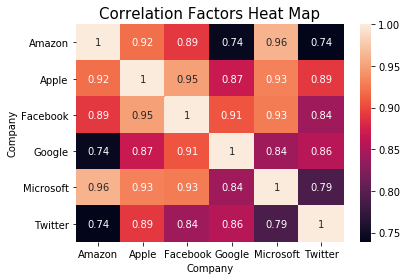

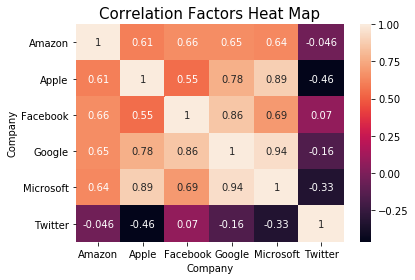

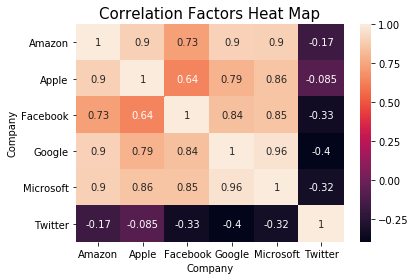

In [29]:
# your code here
years=['2020','2021','2022']
for i in years:
    DataSet2 = DataSet[DataSet['Year']==i][['Date', 'Close', 'Company']]
    DataSet2.head()
    df_pivot = DataSet2.pivot('Date','Company','Close').reset_index()
    df_pivot.head()
    sns.heatmap(df_pivot.corr(), annot=True).set_title('Correlation Factors Heat Map', size='15')
    b, t = plt.ylim()
    b += 0.5
    t -= 0.5 
    plt.ylim(b, t)
    plt.show() 

# Part 2. 

Airline Industry stock data analysis

In [30]:
start = datetime.datetime(2022, 1, 1)

end = date.today()

In [31]:
# your code here
#United Airlines Holdings, Inc.
UAL= data.DataReader("UAL", 'yahoo', start, end)

#American Airlines Group Inc.
AAL = data.DataReader("AAL", 'yahoo', start, end)

#Spirit Airlines, Inc
SAVE = data.DataReader("SAVE", 'yahoo', start, end)

#Delta Air Lines, Inc.
DAL = data.DataReader("DAL", 'yahoo', start, end)

#China Southern Airlines Company Limited
ZNH= data.DataReader("ZNH", 'yahoo', start, end)

#Frontier Group Holdings, Inc.
ULCC= data.DataReader("ULCC", 'yahoo', start, end)

In [32]:
UAL.reset_index(inplace=True)
UAL["Date"].value_counts()
AAL.reset_index(inplace=True)
AAL["Date"].value_counts()
SAVE.reset_index(inplace=True)
SAVE["Date"].value_counts()
DAL.reset_index(inplace=True)
DAL["Date"].value_counts()
ZNH.reset_index(inplace=True)
ZNH["Date"].value_counts()
ULCC.reset_index(inplace=True)
ULCC["Date"].value_counts()

2022-07-26    1
2022-08-11    1
2022-03-23    1
2022-05-24    1
2022-06-24    1
             ..
2022-07-27    1
2022-09-27    1
2022-10-28    1
2022-02-08    1
2022-05-25    1
Name: Date, Length: 221, dtype: int64

In [33]:
UAL["Company"]='United Airlines Holdings, Inc.'
AAL["Company"]='American Airlines Group Inc.'
SAVE["Company"]='Spirit Airlines, Inc'
DAL["Company"]='Delta Air Lines, Inc.'
ZNH["Company"]='China Southern Airlines Company Limited'
ULCC["Company"]='Frontier Group Holdings, Inc.'

In [34]:
air_info=pd.concat([UAL,AAL,SAVE,DAL,ZNH,ULCC],sort=True)
air_info

Adj Close      Close                         Company       Date  \
0    45.490002  45.490002  United Airlines Holdings, Inc. 2022-01-03   
1    46.250000  46.250000  United Airlines Holdings, Inc. 2022-01-04   
2    45.779999  45.779999  United Airlines Holdings, Inc. 2022-01-05   
3    45.770000  45.770000  United Airlines Holdings, Inc. 2022-01-06   
4    47.310001  47.310001  United Airlines Holdings, Inc. 2022-01-07   
..         ...        ...                             ...        ...   
216  13.460000  13.460000   Frontier Group Holdings, Inc. 2022-11-10   
217  13.590000  13.590000   Frontier Group Holdings, Inc. 2022-11-11   
218  13.540000  13.540000   Frontier Group Holdings, Inc. 2022-11-14   
219  13.950000  13.950000   Frontier Group Holdings, Inc. 2022-11-15   
220  13.670000  13.670000   Frontier Group Holdings, Inc. 2022-11-16   

          High        Low       Open    Volume  
0    46.400002  44.610001  44.669998  13869100  
1    47.020000  45.900002  46.549999  11254900  
2    47.099998  45.540001  46.700001  10987900  
3    46.900002  45.209999  46.459999   8225800  
4    47.770000  45.990002  46.310001  11643900  
..         ...        ...        ...       ...  
216  13.580000  13.240000  13.370000    830100  
217  13.900000  13.380000  13.480000    780400  
218  13.900000  13.480000  13.650000    799100  
219  14.340000  13.790000  13.830000    843100  
220  14.110000  13.645000  14.010000    996466  

[1326 rows x 8 columns]

Draw the closing prices of all companies

In [35]:
Close_df = pd.DataFrame()
Close_df["Dates"] = UAL["Date"]
Close_df["UAL"] = UAL["Close"]
Close_df["AAL"] = AAL["Close"]
Close_df["SAVE"] = SAVE["Close"]
Close_df["DAL"] = DAL["Close"]
Close_df["ZNH"] = ZNH["Close"]
Close_df["ULCC"] = ULCC["Close"]
Upd_Close_df = Close_df.set_index('Dates')
Upd_Close_df.iplot(kind='line', xTitle = "Date", yTitle = "Closing",title='Closing prices')

In [36]:
Adj_Close_df = pd.DataFrame()
Adj_Close_df["Dates"] = UAL["Date"]
Adj_Close_df["UAL"] = UAL["Adj Close"]
Adj_Close_df["AAL"] = AAL["Adj Close"]
Adj_Close_df["SAVE"] = SAVE["Adj Close"]
Adj_Close_df["DAL"] = DAL["Adj Close"]
Adj_Close_df["ZNH"] = ZNH["Adj Close"]
Adj_Close_df["ULCC"] = ULCC["Adj Close"]
Upd_Adj_Close_df = Adj_Close_df.set_index('Dates')
Upd_Adj_Close_df.iplot(kind='spread',xTitle='Date',yTitle='Adj Closing Price',title='Adjacent Closing Price Spread')

Line chart to explain the average closing price for each company

In [37]:
average_closing_price=air_info.groupby('Company').Close.mean().to_frame()
#average_closing_price
average_closing_price.reset_index(inplace=True)
fig = px.line(average_closing_price, x="Company", y="Close", title='Average Closing Price')
fig.show()

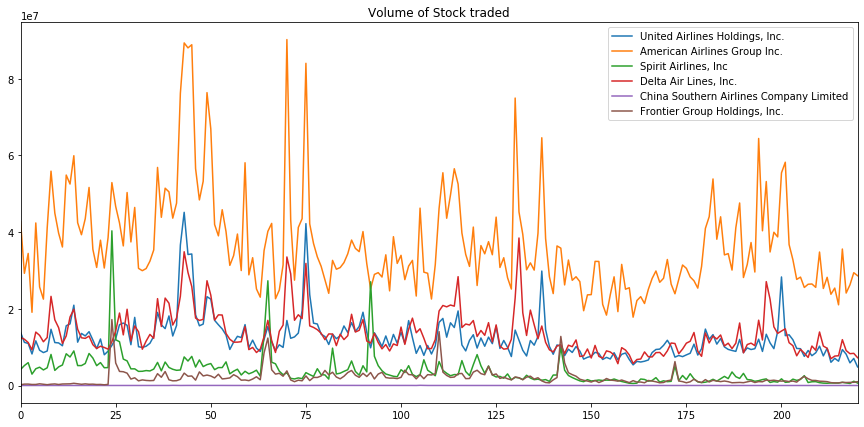

In [39]:
UAL['Volume'].plot(label = 'United Airlines Holdings, Inc.', figsize = (15,7))
AAL['Volume'].plot(label = "American Airlines Group Inc.")
SAVE['Volume'].plot(label = 'Spirit Airlines, Inc')
DAL['Volume'].plot(label = 'Delta Air Lines, Inc.')
ZNH['Volume'].plot(label = 'China Southern Airlines Company Limited')
ULCC['Volume'].plot(label = 'Frontier Group Holdings, Inc.')
plt.title('Volume of Stock traded')
plt.legend()

The Graph shows the volume traded by these companies which clearly shows that stocks of American Airlines Group are traded more compared to other airline stocks.

In [40]:
returns1=pd.DataFrame()
returns1=air_info.groupby('Company').Close.pct_change()
returns1

0           NaN
1      0.016707
2     -0.010162
3     -0.000218
4      0.033647
         ...   
216    0.049104
217    0.009658
218   -0.003679
219    0.030281
220   -0.020072
Name: Close, Length: 1326, dtype: float64

Plotting the single day returns of each company

In [41]:
air_info['PCT']=returns1
fig=px.line(air_info,x='Date',y='PCT',color='Company')
fig.show()

In [42]:
#use spread chart

std_max=air_info.groupby('Company').PCT.std().to_frame()
std_max.reset_index(inplace=True)
fig=px.bar(std_max,x='Company',y='PCT',title='Standard Deviation of the returns')
fig.show()

In [43]:

#air_info.iplot(kind='bubble',x='PCT',y='Close',size='Close')
air_info.iplot(kind='bubble',x='Close',y='PCT',size='Close',categories='Company',
                title='Closing price vs the Returns')

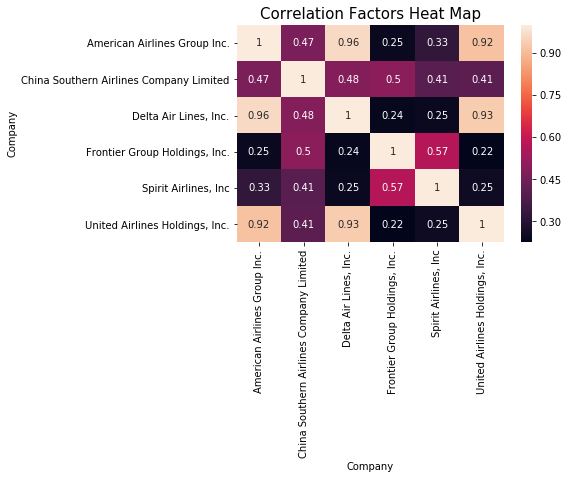

In [44]:
air_info2 = air_info[['Date', 'Close', 'Company']]
air_info2.head()
df= air_info2.pivot('Date','Company','Close').reset_index()
df.head()
sns.heatmap(df.corr(), annot=True).set_title('Correlation Factors Heat Map', size='15')
b, t = plt.ylim()
b += 0.5
t -= 0.5 
plt.ylim(b, t)
plt.show() 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B08885E7C8>,
      dtype=object)

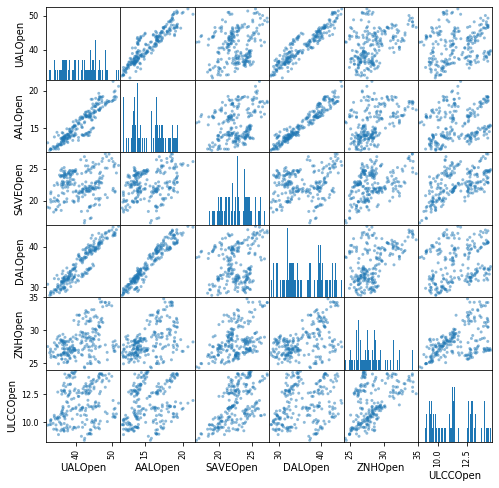

In [50]:
data = pd.concat([UAL['Open'],AAL['Open'],SAVE['Open'],DAL['Open'],ZNH['Open'],ULCC['Open']],axis = 1)
data.columns = ['UALOpen','AALOpen','SAVEOpen','DALOpen','ZNHOpen','ULCCOpen']
scatter_matrix(data, figsize = (8,8), hist_kwds= {'bins':250})

The above graph is the combination of histograms for each company and a subsequent scattered plot taking two companies’ stocks at a time. From the graph, we can clearly figure out that AAL stocks are loosely showing a linear correlation with DAL and UAL.

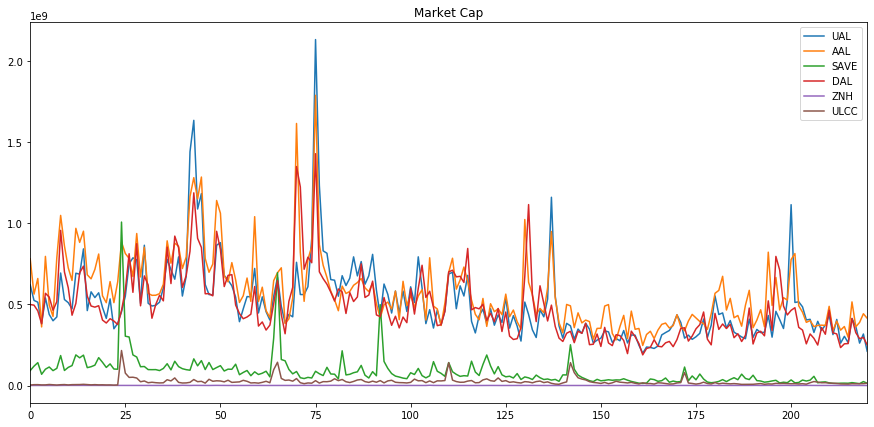

In [51]:
#Market Capitalisation
UAL['MarktCap'] = UAL['Open'] * UAL['Volume']
AAL['MarktCap'] = AAL['Open'] * AAL['Volume']
SAVE['MarktCap'] = SAVE['Open'] * SAVE['Volume']
DAL['MarktCap'] = DAL['Open'] * DAL['Volume']
ZNH['MarktCap'] = ZNH['Open'] * ZNH['Volume']
ULCC['MarktCap'] = ULCC['Open'] * ULCC['Volume']
UAL['MarktCap'].plot(label = 'UAL', figsize = (15,7))
AAL['MarktCap'].plot(label = 'AAL')
SAVE['MarktCap'].plot(label = 'SAVE')
DAL['MarktCap'].plot(label = 'DAL')
ZNH['MarktCap'].plot(label = 'ZNH')
ULCC['MarktCap'].plot(label = 'ULCC')
plt.title('Market Cap')
plt.legend()

we have plotted a graph for Volume * Share price to better compare the companies.
As we can clearly see from the graph that UAL seems to be traded on a higher side.

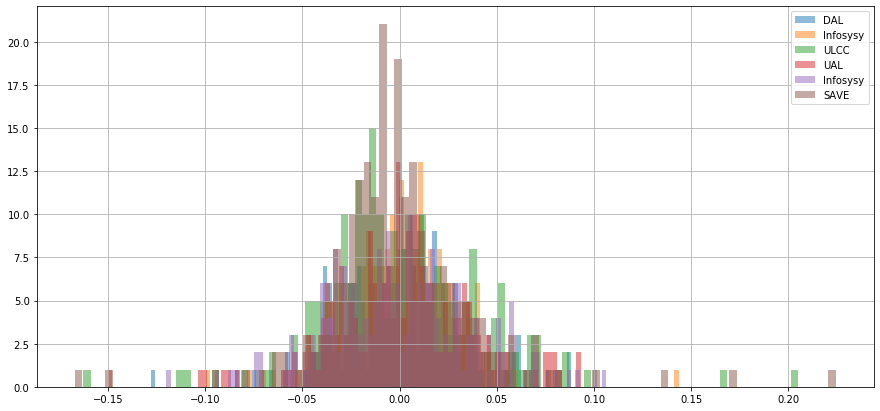

In [60]:
#Volatility
UAL['returns'] = (UAL['Close']/UAL['Close'].shift(1)) -1
AAL['returns'] = (AAL['Close']/AAL['Close'].shift(1))-1
SAVE['returns'] = (SAVE['Close']/SAVE['Close'].shift(1)) - 1
DAL['returns'] = (DAL['Close']/DAL['Close'].shift(1)) -1
ZNH['returns'] = (ZNH['Close']/ZNH['Close'].shift(1))-1
ULCC['returns'] = (ULCC['Close']/ULCC['Close'].shift(1)) - 1
DAL['returns'].hist(bins = 100, label = 'DAL', alpha = 0.5, figsize = (15,7))
ZNH['returns'].hist(bins = 100, label = 'Infosysy', alpha = 0.5)
ULCC['returns'].hist(bins = 100, label = 'ULCC', alpha = 0.5)
UAL['returns'].hist(bins = 100, label = 'UAL', alpha = 0.5, figsize = (15,7))
AAL['returns'].hist(bins = 100, label = 'Infosysy', alpha = 0.5)
SAVE['returns'].hist(bins = 100, label = 'SAVE', alpha = 0.5)
plt.legend()


It is clear from the graph that the percentage increase in stock price histogram for SAVE is the widest which indicates the stock of SAVE is the most volatile among the six companies compared.

# Great Job!
